# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2  AC 209 : Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


In [3]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)


### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.

Names of people you have worked with goes here: 

<hr style="height:2pt">

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<hr style="height:2pt">


<div class='theme'>Linear Algebra, Accuracy, and Confidence Intervals </div>
In this part of the homework, you will see how _uncertainty_ in the beta coefficients can directly impact our ability to make predictions with a linear regression model and how in general we can do inference on the predictors. You will explore a linear-algebra formula that tells us how accurately we've learned the beta parameters, going beyond simple SEs to describe the joint distribution of the betas. You'll see that the structure of the $X$ data can strongly impact how well we can learn the betas, and you'll determine desirable prroperties of the $X$ data.

The data for this supplement are the same as in lab1, and are imported for you in the cells below.

In [5]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("data/cleaned_mtcars.csv")
df.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
y = df[['mpg']].values
X = df[['cyl','disp','hp','wt','qsec']]

X = sm.add_constant(X)

---- 


<div class='exercise'> <b> Question 5 [4 pts] </b> </div>

**5.1** Fit a simple linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our prediction at various values of `disp` and make a well-labeled plot showing
 1. The observed values of `disp` and `mpg`.
 2. The regression line.
 3. The upper and lower bounds of the 95% confidence interval for the _predicted_ (not the observed) `mpg` at any given displacement.
 
**5.2** Why do we have a confidence interval for our predicted value? Why isn't the prediction just a single number?

**5.3** Someone asks what `mpg` you would predict for a `disp` value of 400. What do you tell them? paying attention to the confidence interval (5.1.3) above?

**5.4** Why does the 95% confidence interval for the predicted `mpg` appear to curve as we move away from the data's center? 

### Answers

**5.1 Fit a linear regression model predicting `mpg` via `disp`. Use the `FittedOLS.get_prediction().summary_frame()` method to access the confidence intervals for our prediction at various levels of `disp` and make a well-labled plot showing**
 1. **The observed values of weight and mpg**
 2. **The regression line**
 3. **The upper and lower bounds of the 95% confidence interval for the _mean/predicted mpg_ at any given displacement**
 

In [7]:
# your code here 
model = OLS(y, X[['disp','const']]).fit()
summary = model.get_prediction().summary_frame()
summary.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,23.005436,0.664391,21.648568,24.362303,16.227868,29.783003
1,23.005436,0.664391,21.648568,24.362303,16.227868,29.783003
2,25.148622,0.815316,23.483523,26.813720,18.302683,31.994561
3,18.966354,0.588977,17.763503,20.169205,12.217933,25.714774
4,14.762412,0.837509,13.051990,16.472833,7.905308,21.619515


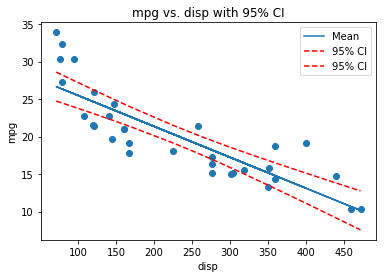

In [8]:
# plot ovbserved CI
plt.scatter(X.disp, y)
plt.plot(X.disp, summary['mean'], label = 'Mean')
x, lower = zip(*sorted(zip(X.disp, summary['mean_ci_lower'])))
plt.plot(x, lower, 'r--', label = '95% CI')
x, upper = zip(*sorted(zip(X.disp, summary['mean_ci_upper'])))
plt.plot(x, upper, 'r--', label = '95% CI')
plt.xlabel('disp')
plt.ylabel('mpg')
plt.title('mpg vs. disp with 95% CI')
plt.legend()

**5.2 Why do we have a confidience interval for our predicted value? Why isn't the prediction just a single number?**

*your answer here*

Our data is only a sample from the entire population. The single mean value predicted by our regression represents our prediction given that our sample were the entire population. However, we know that if we had taken a different sample, our regression would have different coefficients and our prediction would have been different. We include a confidence interval to quantify this uncertainty.

**5.3 Someone asks what `mpg` you would predict for a `disp` value of 400. What do you tell them, paying attention to the confidence interval (5.2.3) above?**

In [9]:
summary = model.get_prediction([400,1]).summary_frame()
summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,13.113807,0.983136,11.105976,15.121638,6.176537,20.051077


In [10]:
# your code here
print('prediction: ', summary['mean'].values[0])
print('95% CI Lower (observed): ', summary['obs_ci_lower'].values[0])
print('95% CI Upper (observed): ', summary['obs_ci_upper'].values[0])

prediction:  13.113806771049497
95% CI Lower (observed):  6.1765369580687866
95% CI Upper (observed):  20.051076584030206


*your answer here*

If I had to predict a single value, I would predict that the value is 13.11. I would also say that I am "reasonably confident" that the value is between 6.17 and 20.05. We use the prediction confidence interval because this takes into account both the sampling error and the irreducible noise.

**5.4 Why does the 95% confidence interval for the predicted `mpg` appear to curve as we move away from the data's center?**

# *your answer here*

Intuitively, the data curves because, due to our "samples" coming from the same population, the variation in the regression coefficients are correlated. If the sample from our population leads to a higher intercept term, the slope will be more negative. Likewise, if the the intercept term is lower, the slope will be less negative. This results in the confidence interval widening as we move away from the center of the data.

Mathetmatically, we see this from the formula for the confidence interval:

$$
\text{CI} = y \hat \pm t_{n-2}s\sqrt{\frac{1}{n}+\frac{(x-\overline x)^2}{(n-1)\sigma}}
$$

As we get further away from the center of the data, $(x-\overline x)^2$ grows where $x$ is the $x$-value for which we are calculating the confidence interval and $\overline x$ is the mean of the x values.

<div class='exercise'><b> Question 6 [8 pts] </b></div>
Hopefully, in the question above you recognized that uncertainty in the beta coefficients could impact the certainty of our predictions. In this question and the next, we're going to explore properties of the data that can make us more or less certain of the values of the betas.

**6.1** Fit a multiple linear regression to the full X matrix (on the car data). That is, predict `mpg` using `cyl`,`disp`,`hp`,`wt`, and `qsec`.

**6.2** The formula for the covariance of the vector of betas, assuming the linear regression model holds, is:
$${\rm Cov}(\beta) = \sigma^2\left(X^TX\right)^{-1}.$$
Compute and display this matrix for the car data. 

**6.3** Verify that the SE reported by statsmodels matches the square root of the variance listed for that variable in your calculated covariance matrix.

**6.4** Interpret the matrix formula above. At a minimum, discuss what affects our ability to estimate the betas accurately. When would you expect two betas to have large/small covariances? [This is intended as an open-ended question. You will be graded only on the specified minimum].

**Hint**: we don't know $\sigma^2$, but we can estimate them.<BR>
**Hint**: remember that numpy's normal distribution expects a standard deviation and not a variance.

### Answers

**6.1 Fit a multiple linear regression to the full X matrix (on the car data). That is, predict `mpg` using `cyl`,`disp`,`hp`,`wt`, and `qsec`.**

In [11]:
# your code here
full_model = OLS(y, X).fit()

**6.2 The formula for the covariance of the vector of betas, assuming the linear regression model holds, is:
$${\rm Cov}(\beta) = \sigma^2\left(X^TX\right)^{-1}.$$
Compute and display this matrix for the car data. **

In [12]:
y.shape

(32, 1)

In [13]:
# compute variance
y_hat = full_model.predict(X)
var = np.sum((y.reshape(32,)-y_hat)**2)/(len(y)-X.shape[1])
var

6.487897883027459

In [14]:
full_model.scale

6.4878978830274585

In [15]:
# your code here
cov = var*np.linalg.inv(np.dot(X.T, X))
pd.DataFrame(cov)

,0,1,2,3,4,5
0,98.368517,-3.780794,0.018899,-0.083821,4.959981,-4.638669
1,-3.780794,0.511577,-0.004108,-0.001251,-0.169858,0.128479
2,0.018899,-0.004108,0.000142,-0.000024,-0.008850,0.000328
3,-0.083821,-0.001251,-0.000024,0.000233,-0.004826,0.004399
4,4.959981,-0.169858,-0.008850,-0.004826,1.568470,-0.347664
5,-4.638669,0.128479,0.000328,0.004399,-0.347664,0.237618


**6.3 Verify that the SE reported by statsmodels matches the square root of the variance listed for that variable in your calculated covariance matrix.**

In [16]:
np.diag(np.sqrt(cov))

/Users/joshfeldman/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


array([9.91809038, 0.71524643, 0.01190742, 0.01526723, 1.25238578,
       0.48746086])

In [17]:
# your code here
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     29.51
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           6.18e-10
Time:                        20:49:09   Log-Likelihood:                -72.003
No. Observations:                  32   AIC:                             156.0
Df Residuals:                      26   BIC:                             164.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8736      9.918      3.617      0.001      15.487      56.261
cyl           -1.1561      0.715     -1.616      0.118      -2.626       0.314
disp           0.0119      0.012      1.004      0.325      -0.013       0.036
hp            -0.0158      0.015     -1.037      0.309      -0.047       0.016
wt            -4.2253      1.252     -3.374      0.002      -6.800      -1.651
qsec           0.2538      0.487      0.521      0.607      -0.748       1.256
==============================================================================
Omnibus:                        4.925   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.534
Skew:                           0.782   Prob(JB):                        0.171
Kurtosis:                       3.453   Cond. No.                     6.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*your answer here*

They are equivalent.

**6.4 Interpret the matrix formula above. At a minimum, discuss what affects our ability to accurately estimate the betas. When would you expect two betas to have large/small covariances? [This is intended as an open-ended question. You will only be graded on the specified minimum].**

*your answer here*

Generally speaking, there are two forces that affect our ability to accurately estimate betas. The first is the degree to which a linear combination of the covariates can predict the dependent variable. This is represented by the $\sigma^2$ term, which decreases as our linear model becomes more predictive. 

The other force that affects our ability to estimate the coefficients is the degree to which our covariates are orthogonal. When they are close to orthogonal, $(X^TX)^{-1}$ becomes closer to being a diagonal matrix, which means that variation in one parameter has little impact on other parameters. If the covariates are collinear, even if our model can predict the dependent variable well, there will still be variation in the coefficients because one can reach the same y vector with different linear combinations of the covariates. This, in turn, increases our uncertainty in the estimates of our beta values.

<div class='exercise'> <b> Question 7 [12 pts]: What affects our knowledge of the betas? </b></div> 


**7.1** Create a separate dataset `edit1` with a new column `noise` that is totally independent of the other columns (random values from an exponential distribution). What effects do you see on our ability to estimate the betas?

**7.2** Create a separate dataset `edit2` with a new column `ratio` that is the ratio of a car's horsepower to its weight. What change do you see in our certainty about weight's effect on mpg?

**7.3** Create a separate dataset `edit3` with a new column `combo` that is horsepower+displacement+weight+ Normal(0,.01) noise. How well can we estimate the betas for this dataset, and which ones are correlated?

**7.4** If you could choose the different features in your data (either because you're running a lab experiment manipulating the X values, or by deciding which columns to measure/keep), how would you like your features to relate? Specifically, how can you get as good an estimate of the betas as possible?

**Hint**: Should introducing pure noise give us meaningfully more accurate beta values? <br>
**Hint**: What happens if $X^TX$ is diagonal?

### Answers

**7.1  Create a separate dataset `edit1` with a new column `noise` that is totally independent of the other columns (random values from an exponential distribution) ... **

In [18]:
def beta_covariance(model, y, X):
    y_hat = model.predict(X)
    var = np.sum((y.reshape(X.shape[0],)-y_hat)**2)/(len(y)-2)
    cov = var*np.linalg.pinv(np.dot(X.T, X))
    return cov

In [19]:
# your code here
edit1 = X.copy()
edit1['noise'] = np.random.exponential(size = len(edit1))
full_model_edit1 = OLS(y, edit1).fit()
pd.DataFrame(beta_covariance(full_model_edit1, y, edit1))

,0,1,2,3,4,5,6
0,78.648700,-2.944955,0.013115,-0.068860,4.156655,-3.709904,-0.312178
1,-2.944955,0.404197,-0.003291,-0.001071,-0.126290,0.099587,-0.009525
2,0.013115,-0.003291,0.000115,-0.000015,-0.007364,0.000344,0.000491
3,-0.068860,-0.001071,-0.000015,0.000191,-0.004418,0.003602,0.000775
4,4.156655,-0.126290,-0.007364,-0.004418,1.290439,-0.285919,-0.068506
5,-3.709904,0.099587,0.000344,0.003602,-0.285919,0.189875,0.015037
6,-0.312178,-0.009525,0.000491,0.000775,-0.068506,0.015037,0.086243


Adding a column of noise decreases the standard error on our covariates.

**7.2 Create a separate dataset `edit2` with a new column `ratio` that is the ratio of a car's horsepower to its weight ... **

In [20]:
# your code here
edit2 = X.copy()
edit2['ratio'] = edit2.hp / edit2.wt
full_model_edit2 = OLS(y, edit2).fit()
pd.DataFrame(beta_covariance(full_model_edit2, y, edit2))

,0,1,2,3,4,5,6
0,140.121818,-4.303054,0.028160,0.185488,-6.913166,-4.750160,-0.882365
1,-4.303054,0.461514,-0.003772,-0.005929,0.063740,0.124963,0.016586
2,0.028160,-0.003772,0.000125,0.000034,-0.010051,0.000124,-0.000189
3,0.185488,-0.005929,0.000034,0.001408,-0.056566,0.000329,-0.004128
4,-6.913166,0.063740,-0.010051,-0.056566,3.630378,-0.149654,0.179257
5,-4.750160,0.124963,0.000124,0.000329,-0.149654,0.215306,0.011878
6,-0.882365,0.016586,-0.000189,-0.004128,0.179257,0.011878,0.014124


Adding the ratio column increase the standard error of the intercept parameter, and the coefficients for horse power and weight. It decreases the standard error for the other parameters.

**7.3 Create a separate dataset `edit3` with a new column `combo` that is horsepower+displacement+weight+ Normal(0,.01) noise... **

In [21]:
# your code here
edit3 = X.copy()
edit3['ratio'] = edit3.hp + edit3.disp + edit2.wt + np.random.normal(0,.01)
full_model_edit3 = OLS(y, edit3).fit()
pd.DataFrame(beta_covariance(full_model_edit3, y, edit3))

,0,1,2,3,4,5,6
0,85.257881,-3.276780,-0.989699,-1.078720,3.293435,-4.020364,1.006073
1,-3.276780,0.443367,0.032300,0.034776,-0.111351,0.111349,-0.035860
2,-0.989699,0.032300,0.086096,0.085003,-0.257711,0.072006,-0.084071
3,-1.078720,0.034776,0.085003,0.084277,-0.255172,0.075535,-0.083122
4,3.293436,-0.111351,-0.257711,-0.255172,0.773285,-0.229587,0.251944
5,-4.020364,0.111349,0.072006,0.075535,-0.229587,0.205936,-0.071722
6,1.006073,-0.035860,-0.084071,-0.083122,0.251944,-0.071722,0.082168


The standard error of the intercept and coefficients for displacement, horsepower, and weight increase a lot. The standard error for the other coefficients slightly decrease.

**7.4 If you could choose the different features in your data (either because you're running a lab experiment manipulating the X values, ... **

*your answer here*

I would want my features $x_1, x_2, ..., x_n$ to be as orthogonal as possible and as explanatory as possible. If we were to do this perfectly, this would lead to $X^TX$ having the squared length of the feature vectors on the diagonal and zeros off the diagonal. The covariance matrix would be a diagonal matrix with $\frac{\sigma^2}{||x_i||^2}$ on the diagonal, meaning that each $\beta_i$ is uncorrelated with one another. 

Since our variables explain the dependent variable well, $\sigma^2$ would also be small.

These two conditions, orthogonalaity and predictive power, would make the regression model accurate and would decrease the standard error on our parameter estimates. 